In [4]:
# Importing the required libraries
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [5]:
import numpy as np
import matplotlib.pyplot as plt

class MazeGenerator:
    def __init__(self, width, height, density):
        self.width = width
        self.height = height
        self.density = density
        self.grid = self.generate_random_maze()

    def generate_random_maze(self):
        maze = np.random.choice([0, 1], size=(self.height, self.width), p=[1-self.density, self.density])
        maze[0, 0] = 0  # Entrance
        maze[-1, -1] = 0  # Exit
        
        
   # Make the entrance and exit
        # Generate a random path from entrance to exit using random walk
        x, y = 0, 0
        while (x, y) != (self.width - 1, self.height - 1):
            directions = [(0, 1), (1, 0)]
            random.shuffle(directions)
            for dx, dy in directions:
                nx, ny = x + dx, y + dy
                if 0 <= nx < self.width and 0 <= ny < self.height:
                    #maze[ny, nx] = 0
                    x, y = nx, ny
                    break        
        
        return maze

    def display(self, start_pos, goal_pos, path=None):
        plt.imshow(self.grid, cmap='binary')

        # Mark the entrance and exit positions
        plt.scatter(start_pos[1], start_pos[0], color='red', marker='o', s=50, label='Start')
        plt.scatter(goal_pos[1], goal_pos[0], color='green', marker='o', s=50, label='Goal')

        if path:
            # Plot the learned path
            path_x, path_y = zip(*path)
            plt.plot(path_y, path_x, marker='o', color='blue', markersize=1, label='Learned Path')

        plt.legend()
        plt.show()







In [13]:
# Create a maze generator instance
# Define the dimensions of the maze
width = 20
height = 20

# Define the density of walls in the maze (between 0 and 1)
density = 0.3
maze_generator = MazeGenerator(width, height, density)

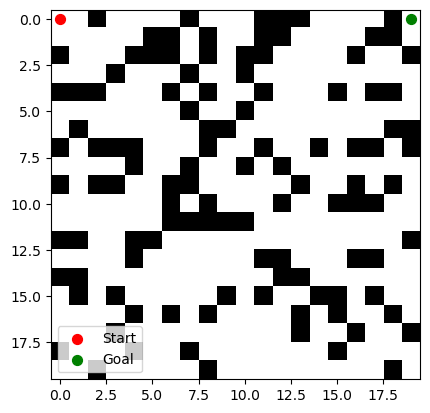

In [14]:


# Specify the starting and goal positions
startPos = (0,0)
goalPos = (0,height-1)

# Display the generated maze as a figure with starting and goal positions
maze_generator.display(startPos, goalPos)

In [5]:
import numpy as np

class QLearningMazeSolver:
    def __init__(self, maze, startPos, goalPos, alpha=0.1, gamma=1, epsilon=0.1, epochs=15000):
        self.maze = maze
        self.startPos = startPos
        self.goalPos = goalPos
        self.alpha = alpha  # Learning rate
        self.gamma = gamma  # Discount factor
        self.epsilon = epsilon  # Exploration rate
        self.epochs = epochs  # Number of episodes
        self.height, self.width = maze.shape  # Get maze dimensions
        self.q_table = np.zeros((self.height, self.width, 4))  # Q-table: 4 possible actions (up, down, left, right)


    def greedy_policy(self, state):
        q_values = self.q_table[state[0], state[1]]
        max_q_value = np.max(q_values)
        # Find indices of actions with maximum Q-value
        greedy_actions = [i for i, q_value in enumerate(
            q_values) if q_value == max_q_value]
        # If there are multiple greedy actions, randomly select one
        action = np.random.choice(greedy_actions)
        #action = np.argmax(q_values)
        return action

    def eps_greedy_policy(self, state):
        if np.random.uniform(0, 1) < self.epsilon:
            return np.random.randint(0, 4)  # Random action (exploration)
        else:
            return self.greedy_policy(state)


    def choose_action(self, state):
        return self.eps_greedy_policy(state)

    def update_q_table(self, state, action, reward, next_state):
        self.q_table[state[0], state[1], action] += self.alpha * (reward + self.gamma * np.max(self.q_table[next_state[0], next_state[1]]) - self.q_table[state[0], state[1], action])

    def solve_maze(self):
        episode_steps = []
        for ep in range(self.epochs):
            state = self.startPos
            steps = 0  # Variable to store steps in current episode
            while state != self.goalPos:
                action = self.choose_action(state) # behavior policy
                next_state, reward = self.take_action(state, action)
                self.update_q_table(state, action, reward, next_state)
                state = next_state
                steps = steps + 1
            if ep % 100 == 0:
                print('episod = {}'.format(ep))
                print('steps = {}'.format(steps))
            episode_steps.append(steps)  # Save total steps for the current episode
                
        return episode_steps

    def take_action(self, state, action):
        actions = [(0, -1), (0, 1), (-1, 0), (1, 0)]  # Possible actions: up, down, left, right
        next_state = (state[0] + actions[action][0], state[1] + actions[action][1])
        
        # Ensure next state is within grid boundaries
        next_state = (max(0, min(self.height - 1, next_state[0])),
                    max(0, min(self.width - 1, next_state[1])))        
        
        # If next position is a wall, keep the next state the same as the current state
        if self.maze[next_state[0], next_state[1]] == 1:
            next_state = state
        
        if next_state == self.goalPos:
            reward = 10  # Reward: 10 for reaching the goal
            done = True  # Episode terminates
        else:
            reward = -1  # Reward: -1 for every movement
            done = False  # Episode continues
        
        return next_state, reward


    def get_path(self):
        path = [self.startPos]
        state = self.startPos
        while state != self.goalPos:
            next_state, _ = self.take_action(state, self.greedy_policy(state))
            path.append(next_state)
            state = next_state
        return path

# Example usage:
solver = QLearningMazeSolver(maze_generator.grid, startPos, goalPos)
episode_steps = solver.solve_maze()


episod = 0
steps = 556
episod = 100
steps = 874
episod = 200
steps = 24
episod = 300
steps = 24
episod = 400
steps = 25
episod = 500
steps = 23
episod = 600
steps = 47
episod = 700
steps = 25
episod = 800
steps = 22
episod = 900
steps = 25
episod = 1000
steps = 23
episod = 1100
steps = 23
episod = 1200
steps = 23
episod = 1300
steps = 24
episod = 1400
steps = 23
episod = 1500
steps = 26
episod = 1600
steps = 21
episod = 1700
steps = 21
episod = 1800
steps = 23
episod = 1900
steps = 30
episod = 2000
steps = 25
episod = 2100
steps = 23
episod = 2200
steps = 23
episod = 2300
steps = 21
episod = 2400
steps = 26
episod = 2500
steps = 23
episod = 2600
steps = 21
episod = 2700
steps = 23
episod = 2800
steps = 21
episod = 2900
steps = 27
episod = 3000
steps = 23
episod = 3100
steps = 27
episod = 3200
steps = 29
episod = 3300
steps = 25
episod = 3400
steps = 25
episod = 3500
steps = 23
episod = 3600
steps = 24
episod = 3700
steps = 21
episod = 3800
steps = 23
episod = 3900
steps = 23
episod = 4

Text(0, 0.5, 'steps')

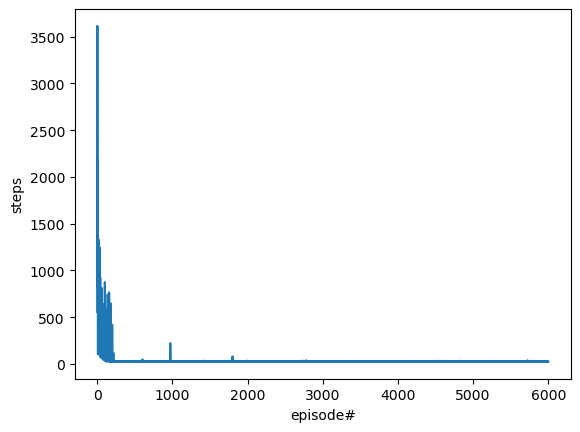

In [6]:
plt.plot(episode_steps[0:6000])
plt.xlabel('episode#')
plt.ylabel('steps')

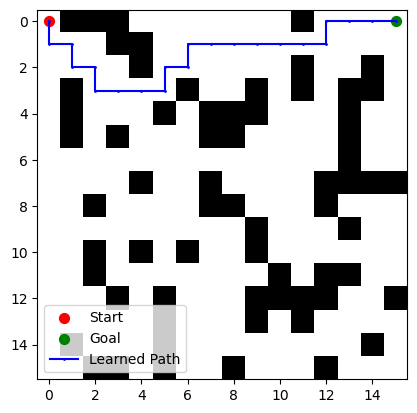

In [7]:
path = solver.get_path()
# Display the maze with the learned path
maze_generator.display(startPos, goalPos, path)